In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import pandas as pd

import numpy as np
import os
import shutil
import posixpath
import wfdb
import seaborn as sn

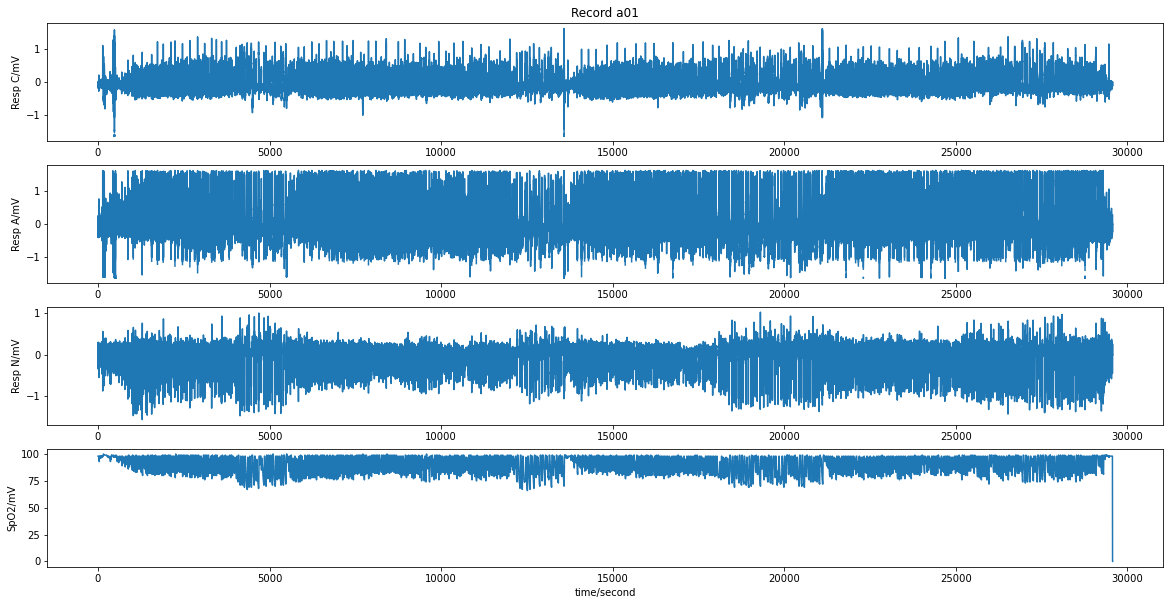

{'record_name': 'a01r',
 'n_sig': 4,
 'fs': 100,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 2956796,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['Resp C', 'Resp A', 'Resp N', 'SpO2'],
 'p_signal': array([[-0.1015 , -0.3446 ,  0.23545, 98.     ],
        [-0.1025 , -0.3455 ,  0.2364 , 98.     ],
        [-0.1035 , -0.3464 ,  0.23735, 98.     ],
        ...,
        [ 0.     ,  0.     ,  0.     ,  0.     ],
        [ 0.     ,  0.     ,  0.     ,  0.     ],
        [ 0.     ,  0.     ,  0.     ,  0.     ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a01r.dat', 'a01r.dat', 'a01r.dat', 'a01r.dat'],
 'fmt': ['16', '16', '16', '16'],
 'samps_per_frame': [1, 1, 1, 1],
 'skew': [None, None, None, None],
 'byte_offset': [None, None, None, None],
 'adc_gain': [20000.0, 20000.0, 20000.0, 1.0],
 'baseline': [0, 0, 0, 0],
 'units': ['mV', 'mV', 'mV', 'mV'],
 'adc_res': [16, 16, 16, 16],
 'adc_zero': [0, 0, 0, 0],
 'init_val

In [4]:
# docs: https://wfdb.readthedocs.io/en/latest/wfdb.html
# SpO2が含まれているデータは a01r のようにrが付いている
# records

subjects = ['a01', 'a02', 'a03', 'a04', 'b01', 'c01', 'c02', 'c03']

records = {}

# データの読み込み
for subject in subjects:
    path = "dataset/" + subject + 'r'
    ecg_path = "dataset/" + subject

    records[subject + 'r'] = wfdb.rdrecord(path)  # 計測データ
    records['ecg_' + subject] = wfdb.rdrecord(ecg_path)  # ECGの計測データ
    records['ann_' + subject + 'r'] = wfdb.rdann(path, 'apn', shift_samps=True) # ラベル

# 波形を確認する
record = wfdb.rdrecord('dataset/a01r')
annotation = wfdb.rdann('dataset/a01r', 'apn')

wfdb.plot_wfdb(record=record, title='Record a01', time_units='seconds', figsize=(20,10)) 
display(records['a01r'].__dict__)

In [34]:
# https://archive.physionet.org/physiobank/database/apnea-ecg/annotations.shtml
# display(annotation.__dict__)
display(len(records['ann_a01r'].sample))
display(len(records['ann_a01r'].symbol))

3108000 / 6000
print(records['ann_a01r'].symbol)
display(records['ecg_a01'].__dict__)

489

489

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',

{'record_name': 'a01',
 'n_sig': 1,
 'fs': 100,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 2957000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': array([[-0.06 ],
        [-0.065],
        [-0.06 ],
        ...,
        [ 0.   ],
        [ 0.   ],
        [ 0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a01.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [200.0],
 'baseline': [0],
 'units': ['mV'],
 'adc_res': [12],
 'adc_zero': [0],
 'init_value': [-12],
 'checksum': [5827],
 'block_size': [0]}

In [35]:
# print(record.p_signal.size)  # 4つの信号×時間 = サイズ
# 4信号で割ってアノテーションの個数で割ると大体6000sampleになる
# https://www.physionet.org/lightwave/?db=apnea-ecg/1.0.0 でテストデータを確認できる
# a03rの場合、08:37:50以降はアノテーションの記録がない

print(records['a01r'].p_signal.size / 4 / 489)

6046.617586912065


In [36]:
# 特徴量の抽出、学習用のデータ作成
# 1 sample(6000個のデータ)毎に基本統計量を出してそれをInputに与える
# 例) record.p_signal[0:6000], record.p_signal[6001:12001]で統計量を出す
        
def extract_feature(data):
    return np.hstack([data.mean().values, data.std().values, data.max().values, data.min().values, (data.max() - data.min()).values])

# train用
# 'b01r', 'c01r', 'c02r' はSpO2が0%のため除外、'c01r~c03rのデータはAのラベルが無い'
train_subjects = ['a01', 'a02', 'a04', 'c03']

# test用
test_subjects = ['a03']

data_array = []
for subject in train_subjects:
    # annotation分だけ繰り返す
    ann_count = len(records['ann_' + subject + 'r'].sample)
    data = pd.DataFrame(records[subject + 'r'].p_signal, columns=records[subject + 'r'].sig_name, dtype='float')

    # ECGの信号を追加する
    data['ECG'] = pd.DataFrame(records['ecg_' + subject].p_signal, columns=records['ecg_' + subject].sig_name, dtype='float')

    # Resp Nを消す
    data = data.drop('Resp N', axis=1)
    
    print('---train_subjects---')
    data['SpO2'] = (data['SpO2'] / 100)
    print(data.head())
    data = data.fillna(method='ffill') # 直前の値を使って欠損値埋める
    print(data.isnull().sum())

    # 基本統計量を出す
    # data.describe()
    # ピークの差 (data.max() - data.min()).values
    # np.hstack([data.mean().values, data.std().values, data.max().values, data.min().values])
    start_idx = 0
    end_idx = 6000
    for n in range(0, ann_count):
        data_array.append(extract_feature(data[start_idx:end_idx]))
        start_idx = end_idx + 1
        end_idx = end_idx + 6000

test_data = []
for subject in test_subjects:
    ann_count = len(records['ann_' + subject + 'r'].sample)
    data = pd.DataFrame(records[subject + 'r'].p_signal, columns=records[subject + 'r'].sig_name, dtype='float')
    
    # ECGの信号を追加する
    data['ECG'] = pd.DataFrame(records['ecg_' + subject].p_signal, columns=records['ecg_' + subject].sig_name, dtype='float')

    # Resp Nを消す
    data = data.drop('Resp N', axis=1)

    print('---test_subjects---')
    data['SpO2'] = (data['SpO2'] / 100)
    print(data.head())
    data = data.fillna(method='ffill') # 直前の値を使って欠損値埋める
    print(data.isnull().sum())
    start_idx = 0
    end_idx = 6000
    for n in range(0, ann_count):
        test_data.append(extract_feature(data[start_idx:end_idx]))
        start_idx = end_idx + 1
        end_idx = end_idx + 6000

---train_subjects---
   Resp C  Resp A  SpO2    ECG
0 -0.1015 -0.3446  0.98 -0.060
1 -0.1025 -0.3455  0.98 -0.065
2 -0.1035 -0.3464  0.98 -0.060
3 -0.1045 -0.3473  0.98 -0.075
4 -0.1055 -0.3482  0.98 -0.065
Resp C    0
Resp A    0
SpO2      0
ECG       0
dtype: int64
---train_subjects---
    Resp C   Resp A  SpO2    ECG
0 -0.08525  0.22005  0.96 -0.020
1 -0.08435  0.20915  0.96 -0.020
2 -0.08345  0.19830  0.96 -0.025
3 -0.08260  0.18740  0.96 -0.010
4 -0.08170  0.17655  0.96 -0.010
Resp C    0
Resp A    0
SpO2      0
ECG       0
dtype: int64
---train_subjects---
    Resp C   Resp A  SpO2    ECG
0 -0.14035 -0.14400  0.93 -0.105
1 -0.14060 -0.14650  0.93 -0.130
2 -0.14090 -0.14900  0.93 -0.110
3 -0.14120 -0.15155  0.93 -0.165
4 -0.14150 -0.15405  0.93 -0.320
Resp C    0
Resp A    0
SpO2      0
ECG       0
dtype: int64
---train_subjects---
    Resp C   Resp A  SpO2    ECG
0 -0.13890 -0.63440  0.97  0.040
1 -0.13850 -0.63560  0.97 -0.005
2 -0.13815 -0.63685  0.97  0.015
3 -0.13785 -0.63810

In [37]:
# 学習データ作成
print(len(data_array))
train_X = np.array(data_array)

print(train_X[0].size)
print(train_X[1])
type(train_X)

train_X.shape

# テストデータ作成
print(len(test_data))
test_X = np.array(test_data)
test_X.shape

1963
20
[-5.64733956e-02 -4.05511169e-02  9.73498916e-01  7.42623771e-04
  5.26096529e-02  1.58064974e-01  6.78662729e-03  2.68905308e-01
  8.91000000e-02  5.25450000e-01  9.80000000e-01  1.74000000e+00
 -1.90200000e-01 -4.06650000e-01  9.60000000e-01 -9.00000000e-01
  2.79300000e-01  9.32100000e-01  2.00000000e-02  2.64000000e+00]
519


(519, 20)

In [38]:
# NとAを1,0に変換する
from sklearn.preprocessing import LabelEncoder

label_data = []
for subject in train_subjects:
    le = LabelEncoder()
    le = le.fit(records['ann_' + subject + 'r'].symbol)
    labels = le.transform(records['ann_' + subject + 'r'].symbol)
    label_data = np.concatenate([label_data, labels], 0)

# テスト用のラベル
test_label = []
for subject in test_subjects:
    le = LabelEncoder()
    le = le.fit(records['ann_' + subject + 'r'].symbol)
    test_label = le.transform(records['ann_' + subject + 'r'].symbol)
    
display(label_data)
display(len(label_data))

display(test_label)
display(len(test_label))

array([1., 1., 1., ..., 0., 0., 0.])

1963

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

519

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from keras.utils import np_utils


# モデルの作成
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 1)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [61]:
from keras import optimizers
from keras.utils import plot_model

model.compile(optimizer='RMSProp',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [67]:
history = model.fit(train_X, label_data,
                    batch_size=128,   # 64,128みたいに2の倍数がよく使われるらしい
                    epochs=300,
                    verbose=2)

Epoch 1/300
16/16 - 0s - loss: 0.1002 - accuracy: 0.9674
Epoch 2/300
16/16 - 0s - loss: 0.1015 - accuracy: 0.9674
Epoch 3/300
16/16 - 0s - loss: 0.1005 - accuracy: 0.9674
Epoch 4/300
16/16 - 0s - loss: 0.1010 - accuracy: 0.9664
Epoch 5/300
16/16 - 0s - loss: 0.0997 - accuracy: 0.9638
Epoch 6/300
16/16 - 0s - loss: 0.0981 - accuracy: 0.9674
Epoch 7/300
16/16 - 0s - loss: 0.1021 - accuracy: 0.9679
Epoch 8/300
16/16 - 0s - loss: 0.1014 - accuracy: 0.9674
Epoch 9/300
16/16 - 0s - loss: 0.1002 - accuracy: 0.9654
Epoch 10/300
16/16 - 0s - loss: 0.0989 - accuracy: 0.9664
Epoch 11/300
16/16 - 0s - loss: 0.0989 - accuracy: 0.9679
Epoch 12/300
16/16 - 0s - loss: 0.0994 - accuracy: 0.9654
Epoch 13/300
16/16 - 0s - loss: 0.0983 - accuracy: 0.9699
Epoch 14/300
16/16 - 0s - loss: 0.0998 - accuracy: 0.9659
Epoch 15/300
16/16 - 0s - loss: 0.0997 - accuracy: 0.9674
Epoch 16/300
16/16 - 0s - loss: 0.0989 - accuracy: 0.9648
Epoch 17/300
16/16 - 0s - loss: 0.0999 - accuracy: 0.9648
Epoch 18/300
16/16 - 0s

Text(0.5, 0, 'epoch')

<Figure size 432x288 with 0 Axes>

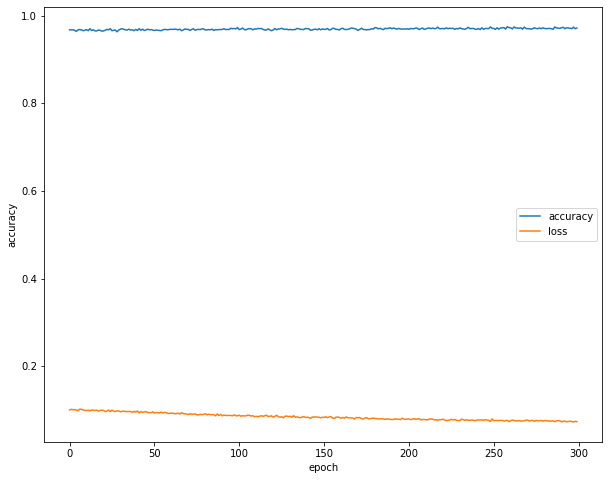

In [68]:
# plotしてみる
# pd.DataFrame(history.history)[['loss', 'accuracy']].plot()

hist_df = pd.DataFrame(history.history)
plt.figure()
hist_df[['accuracy', 'loss']].plot(figsize=(10,8))
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [69]:
print("Evaluate on test data")
results = model.evaluate(test_X, test_label, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 519 samples")
predictions = model.predict(test_X[:519])
print("predictions shape:", predictions)

Evaluate on test data
5/5 [==============================] - 0s 1ms/step - loss: 0.2117 - accuracy: 0.9094
test loss, test acc: [0.21166633069515228, 0.9094412326812744]
Generate predictions for 519 samples
predictions shape: [[0.9729577 ]
 [0.9203725 ]
 [0.9803342 ]
 [0.70287806]
 [0.9910466 ]
 [0.8815118 ]
 [0.98888874]
 [0.12131959]
 [0.9545769 ]
 [0.9272445 ]
 [0.16037142]
 [0.9990746 ]
 [0.33533564]
 [0.9574123 ]
 [0.30882168]
 [0.14300254]
 [0.03769335]
 [0.01136944]
 [0.00997445]
 [0.00751504]
 [0.01208511]
 [0.00811514]
 [0.00457424]
 [0.01526025]
 [0.00440282]
 [0.00821909]
 [0.00812581]
 [0.0083915 ]
 [0.00433198]
 [0.00593516]
 [0.00739065]
 [0.00575635]
 [0.00404489]
 [0.00455388]
 [0.0051524 ]
 [0.00593546]
 [0.00177982]
 [0.00576898]
 [0.00502497]
 [0.0048973 ]
 [0.00587144]
 [0.00672203]
 [0.00485215]
 [0.00465119]
 [0.00459892]
 [0.00473273]
 [0.00579894]
 [0.00446337]
 [0.00437418]
 [0.00681597]
 [0.00709793]
 [0.0063175 ]
 [0.00635159]
 [0.00379494]
 [0.00747976]
 [0.

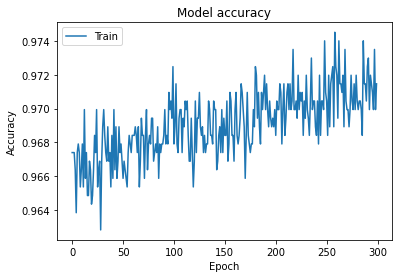

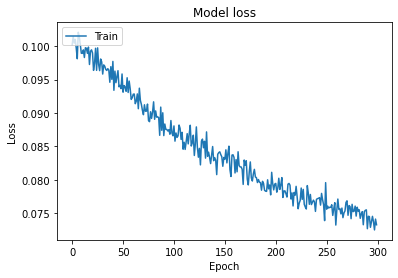

In [70]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

---test_subjects---
    Resp C   Resp A  SpO2    ECG
0 -0.06790 -0.06185  0.92 -0.230
1 -0.06695 -0.06105  0.92 -0.105
2 -0.06605 -0.06030  0.92  0.000
3 -0.06510 -0.05955  0.92  0.000
4 -0.06420 -0.05880  0.92  0.060
Resp C    0
Resp A    0
SpO2      0
ECG       0
dtype: int64
1200
1200
predictions shape: [[0.9574423 ]
 [0.95689976]
 [0.95722544]
 ...
 [0.14341527]
 [0.14345881]
 [0.14376962]]
12000
        Resp C  SpO2    ECG  probability
78000  0.43895  0.89 -0.095     0.042558
78001  0.44535  0.89 -0.095     0.042558
78002  0.45175  0.89 -0.125     0.042558
78003  0.45810  0.89 -0.090     0.042558
78004  0.46455  0.89 -0.115     0.042558


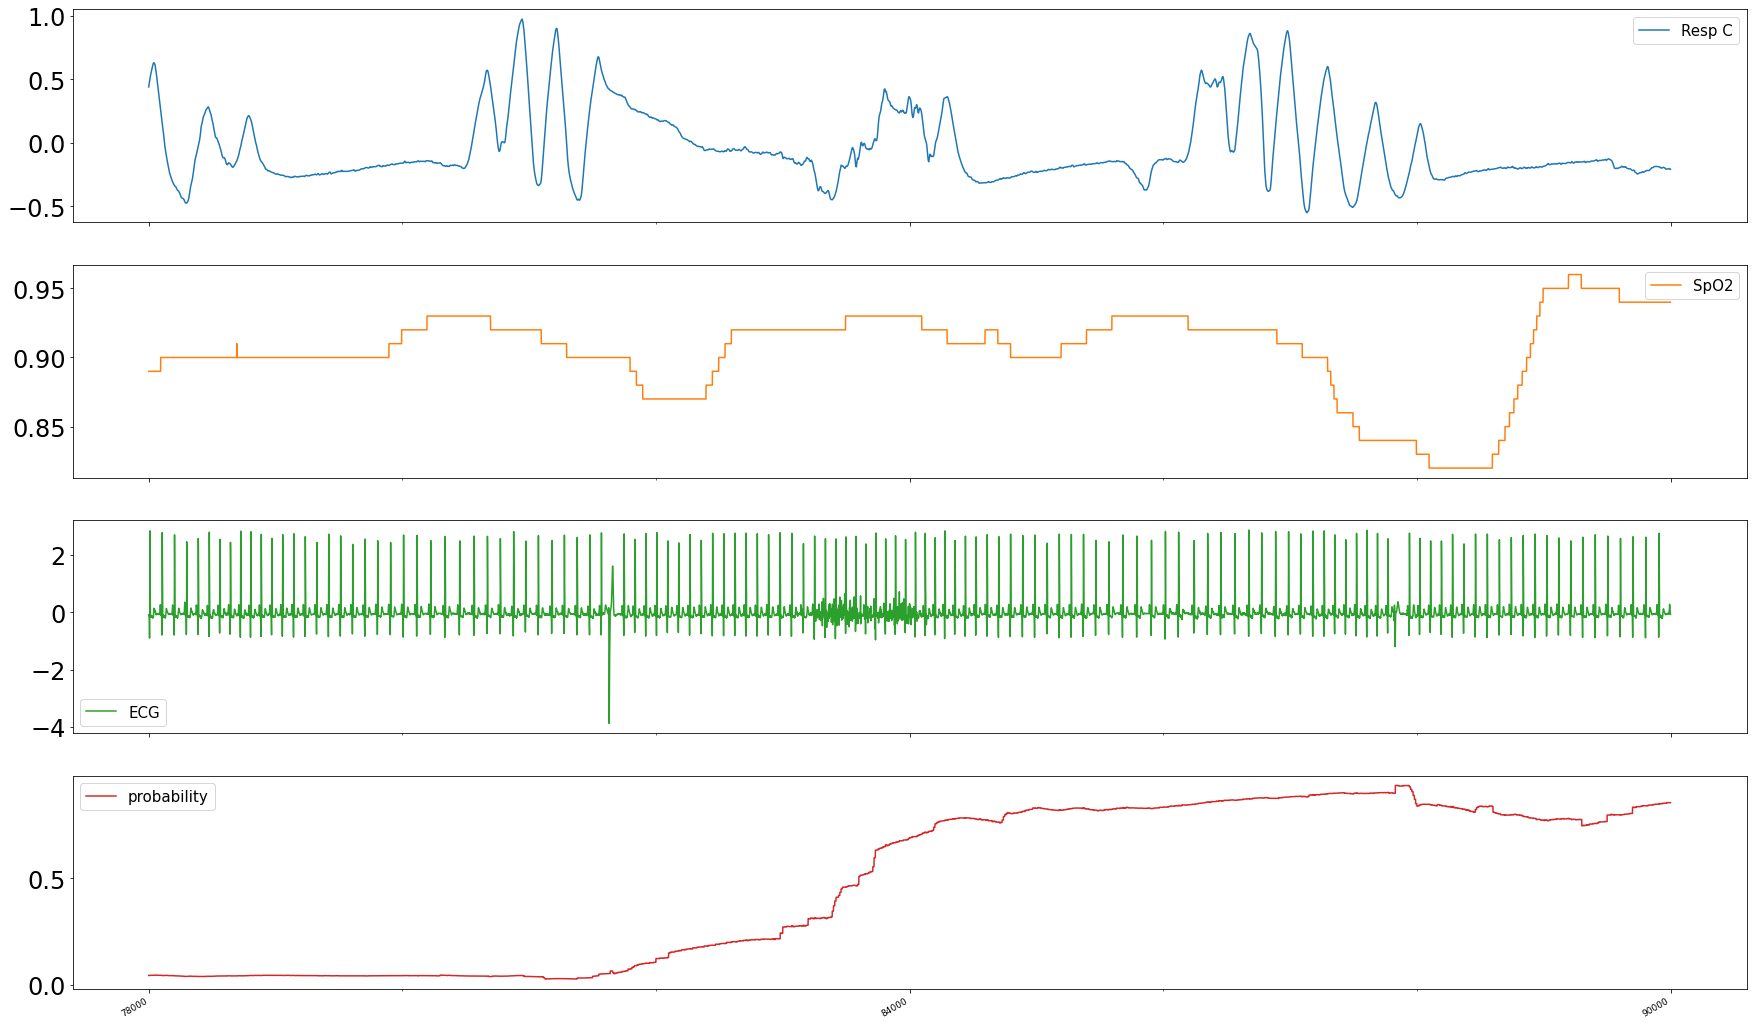

In [144]:
# グラフ表示する

# 学習済みモデルに特徴量を与えて、確率を出す。
# その確率をグラフに表示する
# 13番目まで、Nだけど、14番目からAになる
#
# 11 12 13 14 15 16
# 66000 72000 78000 84000 90000 96000
#
# 100 samples per second
# 6000samplesで1分

test_data_2 = []
for subject in test_subjects:
    # ann_count = len(records['ann_' + subject + 'r'].sample)
    data = pd.DataFrame(records[subject + 'r'].p_signal, columns=records[subject + 'r'].sig_name, dtype='float')
    
    # ECGの信号を追加する
    data['ECG'] = pd.DataFrame(records['ecg_' + subject].p_signal, columns=records['ecg_' + subject].sig_name, dtype='float')

    # Resp Nを消す
    data = data.drop('Resp N', axis=1)

    print('---test_subjects---')
    data['SpO2'] = (data['SpO2'] / 100)
    print(data.head())
    data = data.fillna(method='ffill') # 直前の値を使って欠損値埋める
    print(data.isnull().sum())
    start_idx = 78000
    end_idx = 84000
    last_idx = 96000
    # 10ずつ左に窓をずらしていって、96000まで繰り返す
    # 0から2400で 24000ずらすことになる
    # start_idx = 66000, end_idx = 72000, last_idx = 96000
    for n in range(0, 1200):
        test_data_2.append(extract_feature(data[start_idx:end_idx]))
        start_idx = start_idx + 10
        end_idx = end_idx + 10

print(len(test_data_2))

test_2 = np.array(test_data_2)

print(len(test_2))
predictions = model.predict(test_2[0:2400])
print("predictions shape:", predictions)

# AとNの確率を逆にするため 1を引いて絶対値を求める
predictions = np.abs(predictions - 1)

df = data.iloc[78000:90000, [0,2,3]]

# 10sampleずつ右にずらしているため
# 10個ずつ同じ予測結果の値をappendしていく
predict_data = [] 
for n in predictions:
    for i in range(10):
        predict_data.append(n)
        
print(len(predict_data))

df['probability'] = np.ravel(predict_data)

#df['time'] = df.index

print(df.head())

# データをプロット
# subplots=Trueでグラフを分ける
#df.plot(x=df.columns[4], subplots=True, figsize=(20,10))

# xlim=[78000,80000] 範囲指定
# 
df.plot(xticks=[78000, 84000, 90000], subplots=True, figsize=(30,20))

# フォントサイズの変更など
#plt.rcParams["font.size"] = 15 全体のフォントサイズ
#plt.rcParams['xtick.labelsize'] = 9
#plt.rcParams['ytick.labelsize'] = 24


# dpiを高くすると高解像度になる。グラフをpngで保存
plt.savefig('out_graph.png', dpi=300, orientation='portrait', transparent=False, pad_inches=0.0)

---train_subjects_2---
   Resp C  Resp A  SpO2    ECG
0 -0.1015 -0.3446  0.98 -0.060
1 -0.1025 -0.3455  0.98 -0.065
2 -0.1035 -0.3464  0.98 -0.060
3 -0.1045 -0.3473  0.98 -0.075
4 -0.1055 -0.3482  0.98 -0.065
Resp C    0
Resp A    0
SpO2      0
ECG       0
dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1bc3d8b50>,
      dtype=object)

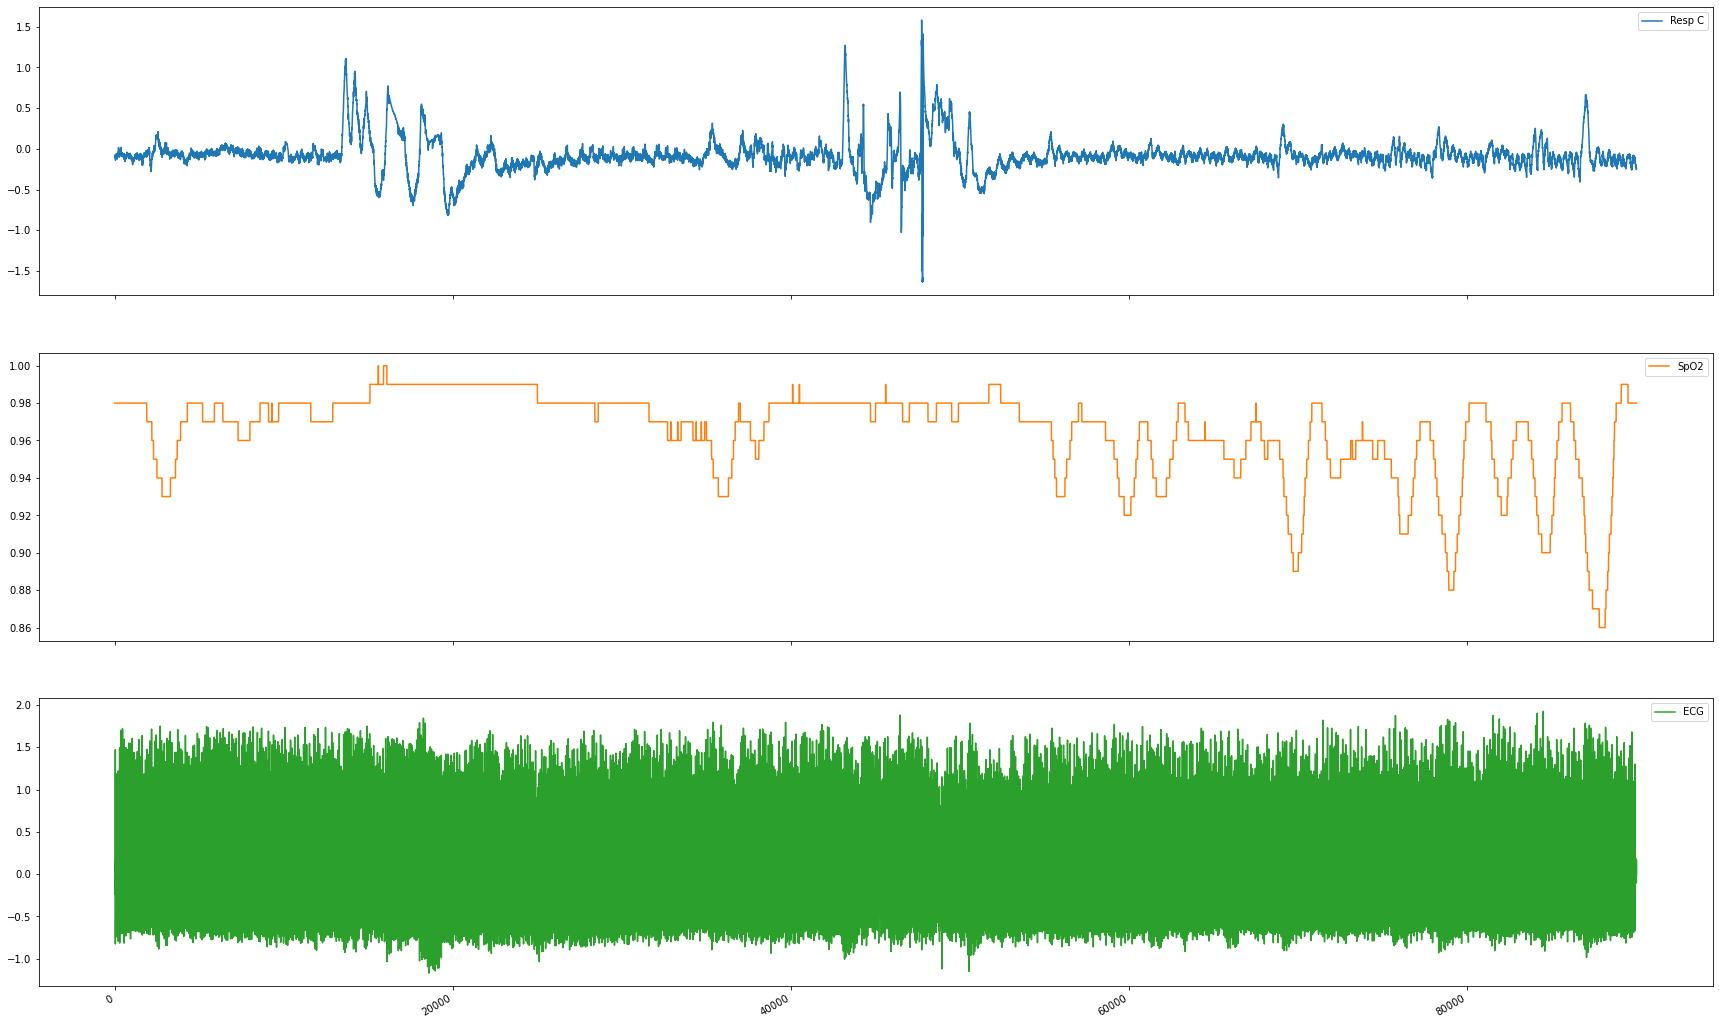

In [11]:
# train用データをグラフにする
train_subjects_2 = ['a01']

data_array = []
for subject in train_subjects_2:
    # annotation分だけ繰り返す
    ann_count = len(records['ann_' + subject + 'r'].sample)
    data = pd.DataFrame(records[subject + 'r'].p_signal, columns=records[subject + 'r'].sig_name, dtype='float')

    # ECGの信号を追加する
    data['ECG'] = pd.DataFrame(records['ecg_' + subject].p_signal, columns=records['ecg_' + subject].sig_name, dtype='float')

    # Resp Nを消す
    data = data.drop('Resp N', axis=1)
    
    print('---train_subjects_2---')
    data['SpO2'] = (data['SpO2'] / 100)
    print(data.head())
    data = data.fillna(method='ffill') # 直前の値を使って欠損値埋める
    print(data.isnull().sum())

df = data.iloc[0:90000, [0,2,3]]
df.plot(subplots=True, figsize=(30,20))
